# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [5]:
data = pd.read_csv('weight-height.csv')
male_df =  data[data['Gender'] == 'Male']
female_df =  data[data['Gender'] == 'Female']

print(f"Male Height mean: {male_df.Height.mean()}") # Male Height mean: 69.02634590621737
print(f"Male Height std: {male_df.Height.std()}") # Male Height sd: 2.8633622286606517
print(f"Male Weight mean: {male_df.Weight.mean()}") # Male Weight mean: 187.0206206581929
print(f"Male Weight std: {male_df.Weight.std()}") # Male Weight sd: 19.781154516763813
print(f"Female Height mean: {female_df.Height.mean()}") # Female Height mean: 63.708773603424916
print(f"Female Height std: {female_df.Height.std()}") # Female Height sd: 2.696284015765056
print(f"Female Weight mean: {female_df.Weight.mean()}") # Female Weight mean: 135.8600930074687
print(f"Female Weight std: {female_df.Weight.std()}") # Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height std: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight std: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height std: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight std: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

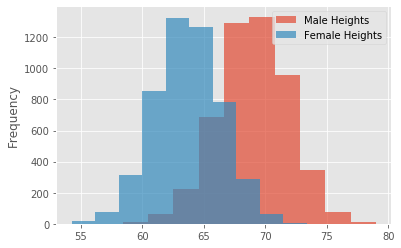

In [10]:
plt.figure()
male_df['Height'].plot.hist(bins = 10, label = 'Male Heights', alpha = 0.7)
female_df['Height'].plot.hist(bins = 10, label = 'Female Heights', alpha = 0.7)
plt.legend()
plt.show()

In [11]:
# Record your observations - are these inline with your personal observations?
"Yes, males are more often taller than females, with a male average around 6 feet and a female average around 5 feet."

'Yes, males are more often taller than females, with a male average around 6 feet and a female average around 5 feet.'

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

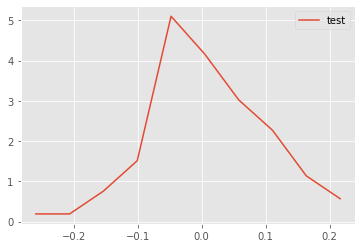

In [14]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

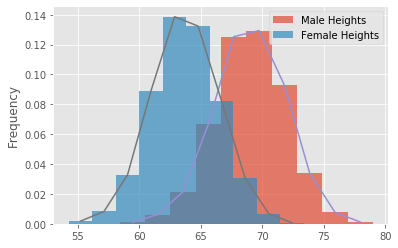

In [26]:
plt.figure()
male_df['Height'].plot.hist(bins = 10, density = True, label = 'Male Heights', alpha = 0.7)
female_df['Height'].plot.hist(bins = 10, density = True, label = 'Female Heights', alpha = 0.7)
male_x, male_y = density(male_df['Height'])
female_x, female_y = density(female_df['Height'])
plt.plot(male_x,male_y)
plt.plot(female_x,female_y)
plt.legend()
plt.show()

## Repeat the above exercise for male and female weights

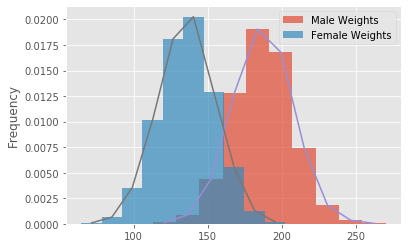

In [27]:
plt.figure()
male_df['Weight'].plot.hist(bins = 10, density = True, label = 'Male Weights', alpha = 0.7)
female_df['Weight'].plot.hist(bins = 10, density = True, label = 'Female Weights', alpha = 0.7)
male_x, male_y = density(male_df['Weight'])
female_x, female_y = density(female_df['Weight'])
plt.plot(male_x,male_y)
plt.plot(female_x,female_y)
plt.legend()
plt.show()

## Write your observations in the cell below

In [28]:
# Record your observations - are these inline with your personal observations?
pr"Yes, same as with heights, men are often heavier than females, with a male average around 180 and a female average around 140."

# What is the takeaway when comparing male and female heights and weights?
"Females are usually smaller in both of these regards, and both have a pretty even distribution around the mean."

'Females are usually smaller in both of these regards, and both have a pretty even distribution around the mean.'

## Repeat the above experiments in seaborn and compare with your results

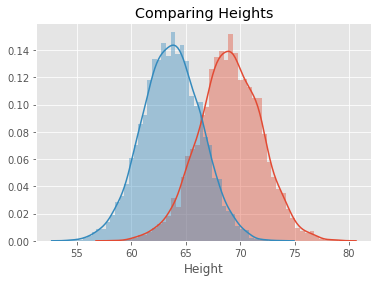

In [23]:
# Code for heights here

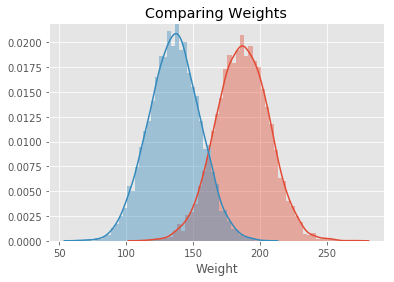

In [24]:
# Code for weights here

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.